In [1]:
# Importo librerias y defino configuraciones

%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats

plt.style.use('default')  # Cambio el estilo de los graficos

sns.set(style="whitegrid")

In [2]:
tipos = {"advertiser_id":"category"}

In [3]:
clicks = pd.read_csv("../../data/clicks.csv.gzip", compression="gzip", dtype=tipos)
installs = pd.read_csv("../../data/installs.csv.gzip", compression="gzip")

## Verificamos la integridad del set de datos

In [4]:
clicks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26351 entries, 0 to 26350
Data columns (total 20 columns):
advertiser_id      26351 non-null category
action_id          0 non-null float64
source_id          26351 non-null int64
created            26351 non-null object
country_code       26351 non-null int64
latitude           26351 non-null float64
longitude          26351 non-null float64
wifi_connection    26351 non-null bool
carrier_id         26340 non-null float64
trans_id           26351 non-null object
os_minor           26339 non-null float64
agent_device       3243 non-null float64
os_major           26339 non-null float64
specs_brand        26351 non-null int64
brand              6235 non-null float64
timeToClick        22977 non-null float64
touchX             23011 non-null float64
touchY             23011 non-null float64
ref_type           26351 non-null int64
ref_hash           26351 non-null int64
dtypes: bool(1), category(1), float64(11), int64(5), object(2)
memory u

In [5]:
clicks.dtypes

advertiser_id      category
action_id           float64
source_id             int64
created              object
country_code          int64
latitude            float64
longitude           float64
wifi_connection        bool
carrier_id          float64
trans_id             object
os_minor            float64
agent_device        float64
os_major            float64
specs_brand           int64
brand               float64
timeToClick         float64
touchX              float64
touchY              float64
ref_type              int64
ref_hash              int64
dtype: object

In [6]:
clicks.isnull().any()

advertiser_id      False
action_id           True
source_id          False
created            False
country_code       False
latitude           False
longitude          False
wifi_connection    False
carrier_id          True
trans_id           False
os_minor            True
agent_device        True
os_major            True
specs_brand        False
brand               True
timeToClick         True
touchX              True
touchY              True
ref_type           False
ref_hash           False
dtype: bool

In [7]:
clicks.isnull().all()

advertiser_id      False
action_id           True
source_id          False
created            False
country_code       False
latitude           False
longitude          False
wifi_connection    False
carrier_id         False
trans_id           False
os_minor           False
agent_device       False
os_major           False
specs_brand        False
brand              False
timeToClick        False
touchX             False
touchY             False
ref_type           False
ref_hash           False
dtype: bool

In [8]:
clicks.isnull().sum()

advertiser_id          0
action_id          26351
source_id              0
created                0
country_code           0
latitude               0
longitude              0
wifi_connection        0
carrier_id            11
trans_id               0
os_minor              12
agent_device       23108
os_major              12
specs_brand            0
brand              20116
timeToClick         3374
touchX              3340
touchY              3340
ref_type               0
ref_hash               0
dtype: int64

In [9]:
clicks["action_id"].isnull().all()

True

#### La columna de action_id es completamente nula, la podemos descartar.

In [10]:
clicks = clicks.drop("action_id", axis=1)

#### Bajo la premisa de que las filas con touchY mayor a 1 son no validas, procedemos a descartar dichas filas del dataset

In [11]:
clicks.drop(clicks[clicks["touchY"] > 1].index, inplace=True)

In [12]:
clicks.sample(5)

,advertiser_id,source_id,created,country_code,latitude,longitude,wifi_connection,carrier_id,trans_id,os_minor,agent_device,os_major,specs_brand,brand,timeToClick,touchX,touchY,ref_type,ref_hash
24288,3,0,2019-03-12T16:42:29.131Z,6333597102633388268,1.235406,1.063737,False,12.0,XPuzL4tUmbw4MTRaxDzRjF9WjO1ORj4,6.768137e+18,NaN,3.072849e+18,392184377613098015,NaN,0.767,0.906,0.287,1891515180541284343,2924792741839201748
10606,3,0,2019-03-07T23:34:26.969Z,6333597102633388268,1.205689,1.070234,False,3.0,9stfx2lluPp9sxiuaidy8KYmgTr3Ue0,6.391567e+18,NaN,7.452406e+18,392184377613098015,NaN,8.085,0.481,0.026,1891515180541284343,36079010667445835
23570,3,6,2019-03-12T14:02:14.192Z,6333597102633388268,1.205689,1.070234,False,13.0,0XEQxeja64oweRw2xAIdy4XMBnGS7po,3.378640e+18,NaN,4.566454e+18,2733035977666442898,NaN,0.166,0.978,0.102,1891515180541284343,3789290718357653039
22552,3,1,2019-03-12T22:26:48.410Z,6333597102633388268,1.205689,1.070234,False,10.0,7gGv5IJawY_LlnIvY45WmzUgws1n4I4,3.378640e+18,NaN,4.566454e+18,2733035977666442898,0.0,NaN,NaN,NaN,1891515180541284343,7027490565873021560
20358,3,1,2019-03-13T22:23:07.953Z,6333597102633388268,1.214036,1.085358,False,2.0,D1serhrXXBXrEzDzhjfZsHIfv4hdc3s,3.378640e+18,NaN,4.566454e+18,2733035977666442898,NaN,6.382,0.490,0.423,1891515180541284343,3770775570176712018


In [13]:
clicks["wifi_connection"].any()

False

#### Todas las filas tienen a False como valor de la columna wifi_connection, por lo que no nos aporta mucho al analisis. #TODO

In [14]:
clicks.describe()

,source_id,country_code,latitude,longitude,carrier_id,os_minor,agent_device,os_major,specs_brand,brand,timeToClick,touchX,touchY,ref_type,ref_hash
count,21181.000000,2.118100e+04,21181.000000,21181.000000,21170.000000,2.116900e+04,2.735000e+03,2.116900e+04,2.118100e+04,5102.000000,17807.000000,17841.000000,17841.000000,2.118100e+04,2.118100e+04
mean,1.445116,6.333597e+18,1.206930,1.070234,8.088144,4.640050e+18,4.206094e+18,3.934739e+18,1.393647e+18,1.433751,182.324742,0.649221,0.467966,1.887392e+18,4.612432e+18
std,2.315928,1.024024e+03,0.004566,0.001893,7.282376,1.644973e+18,2.502523e+18,1.896097e+18,1.169557e+18,1.597090,825.530750,0.306867,0.337826,1.609227e+17,2.667747e+18
min,0.000000,6.333597e+18,1.205058,1.058204,0.000000,6.666626e+17,4.513618e+16,7.436481e+17,3.921844e+17,0.000000,0.017000,0.000000,0.000000,1.494519e+18,9.286192e+14
25%,0.000000,6.333597e+18,1.205689,1.070234,3.000000,3.378640e+18,1.965149e+18,1.774085e+18,3.921844e+17,0.000000,2.422500,0.436000,0.099000,1.891515e+18,2.285487e+18
50%,0.000000,6.333597e+18,1.205689,1.070234,6.000000,3.511538e+18,3.516812e+18,3.072849e+18,3.921844e+17,1.000000,7.829000,0.749000,0.489000,1.891515e+18,4.636259e+18
75%,1.000000,6.333597e+18,1.205689,1.070234,13.000000,6.391567e+18,6.589622e+18,4.566454e+18,2.733036e+18,2.000000,49.412000,0.914000,0.769000,1.891515e+18,6.911234e+18
max,10.000000,6.333597e+18,1.237861,1.085358,116.000000,9.081082e+18,9.221733e+18,7.499732e+18,8.930605e+18,13.000000,17616.188000,1.000000,1.000000,6.323872e+18,9.221118e+18


## 1) Caracteristicas y proveniencia de los clicks

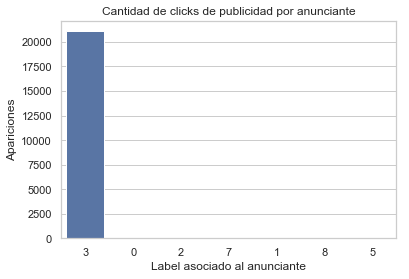

In [15]:
g = sns.countplot(x='advertiser_id', data=clicks, order=clicks['advertiser_id']\
                  .value_counts().index, orient='v')
g.set_xticklabels(g.get_xticklabels())
g.set_xlabel("Label asociado al anunciante")
g.set_ylabel("Apariciones")
g.set_title("Cantidad de clicks de publicidad por anunciante");

Podemos ver que el anunciante 3 es quien muestra la gran mayoria de las publicidades.

#### Vemos como se distribuye la cantidad de apariciones entre los demas anunciantes, sin incluir al anunciante 3

In [16]:
clicks_anunciante_amplificado = clicks[-clicks["advertiser_id"].isin(['3'])]["advertiser_id"].value_counts()

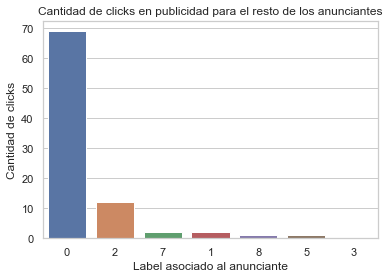

In [17]:
g = sns.countplot(x='advertiser_id', data=clicks[-clicks["advertiser_id"].isin(['3'])], order=\
                  clicks[-clicks["advertiser_id"].isin(['3'])]["advertiser_id"].value_counts().index, orient='v')
g.set_xticklabels(g.get_xticklabels())
g.set_xlabel("Label asociado al anunciante")
g.set_ylabel("Cantidad de clicks")
g.set_title("Cantidad de clicks en publicidad para el resto de los anunciantes");  # O sea omito el anunciante 3

In [18]:
clicks["ref_type"].value_counts()  # ¿Deberian ser dos? (Apple o Android) REVISAR

1891515180541284343    20572
1494519392962156891      567
5016171802147987303       37
6323871695571587575        5
Name: ref_type, dtype: int64

In [19]:
clicks["brand"].value_counts()

0.0     1688
2.0     1563
1.0     1236
4.0      188
3.0      145
6.0      109
5.0      102
9.0       29
7.0       22
8.0       10
10.0       7
12.0       2
13.0       1
Name: brand, dtype: int64

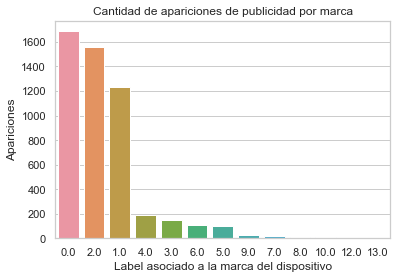

In [20]:
g = sns.countplot(x='brand', data=clicks, order=clicks['brand']\
                  .value_counts().index, orient='v')
g.set_xticklabels(g.get_xticklabels())
g.set_xlabel("Label asociado a la marca del dispositivo")
g.set_ylabel("Apariciones")
g.set_title("Cantidad de apariciones de publicidad por marca");

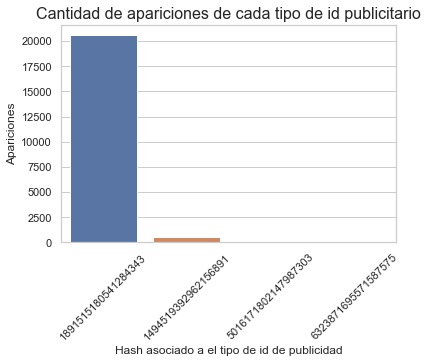

In [21]:
g = sns.countplot(x='ref_type', data=clicks, order=clicks['ref_type']\
                  .value_counts().index, orient='v')
g.set_xticklabels(g.get_xticklabels())
g.set_xlabel("Hash asociado a el tipo de id de publicidad")
g.set_ylabel("Apariciones")
g.set_title("Cantidad de apariciones de cada tipo de id publicitario", fontsize=16)
g.set_xticklabels(g.get_xticklabels(), rotation=45);


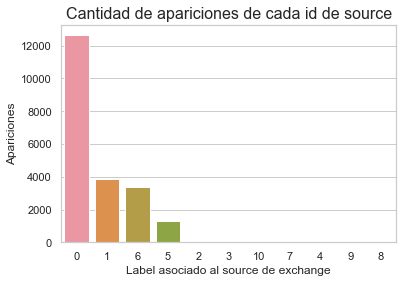

In [22]:
g = sns.countplot(x='source_id', data=clicks, order=clicks['source_id']\
                  .value_counts().index)
g.set_xticklabels(g.get_xticklabels())
g.set_xlabel("Label asociado al source de exchange")
g.set_ylabel("Apariciones")
g.set_title("Cantidad de apariciones de cada id de source", fontsize=16);

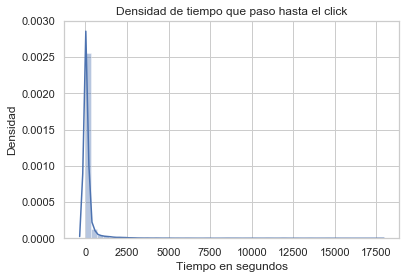

In [23]:
g = sns.distplot(clicks["timeToClick"].dropna())
g.set_title("Densidad de tiempo que paso hasta el click")
g.set_xlabel("Tiempo en segundos")
g.set_ylabel("Densidad");

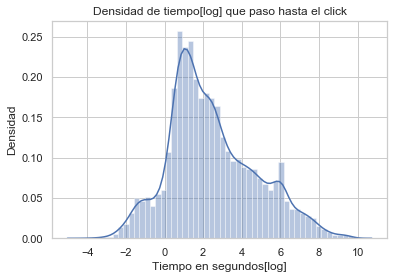

In [24]:
g = sns.distplot(np.log((clicks["timeToClick"].dropna())))
g.set_title("Densidad de tiempo[log] que paso hasta el click")
g.set_xlabel("Tiempo en segundos[log]")
g.set_ylabel("Densidad");

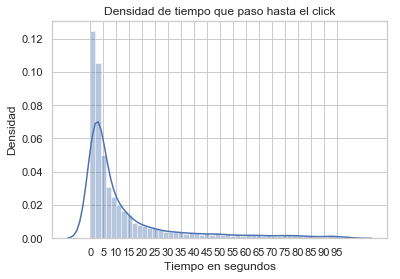

In [25]:
clicks_time = clicks[clicks["timeToClick"] < 100]
g = sns.distplot(clicks_time["timeToClick"].dropna())
g.set_title("Densidad de tiempo que paso hasta el click")
g.set_xlabel("Tiempo en segundos")
g.set_ylabel("Densidad")
plt.xticks([i for i in range(0,100,5)]);

In [26]:
clicks["timeToClick"].describe()

count    17807.000000
mean       182.324742
std        825.530750
min          0.017000
25%          2.422500
50%          7.829000
75%         49.412000
max      17616.188000
Name: timeToClick, dtype: float64

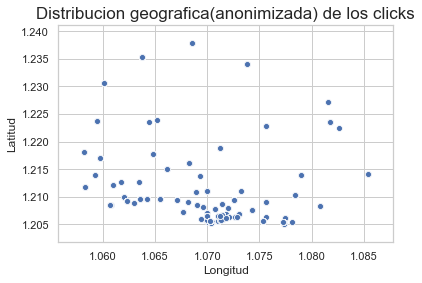

In [27]:
g = sns.scatterplot(x="longitude", y="latitude", data=clicks)
g.set_title("Distribucion geografica(anonimizada) de los clicks", fontsize=17)
g.set_xlabel("Longitud")
g.set_ylabel("Latitud");

#### El grafico nos muestra un distribucion de clicks tal que pareceria haber una mayor concentracion en las longitudes 1.070-1.073 y latitudes 1.205-1.207, junto con una distribucion de varios puntos a la largo del resto del mapa.

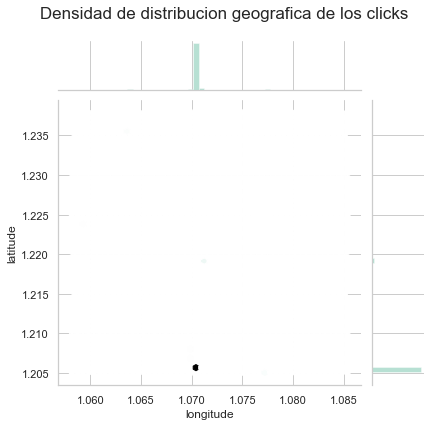

In [28]:
g = sns.jointplot("longitude", "latitude",data=clicks, kind="hex", color="#4CB391")
plt.subplots_adjust(top=0.9)
plt.suptitle("Densidad de distribucion geografica de los clicks", fontsize = 17);

#### Sin embargo si realizamos un grafico de densidad bidimensional podemos ver la gran diferencia de magnitud que hay entre las coordenadas antes mencionadas y el resto del mapa, la inmensa mayoria de los clicks se encuentran en las longitudes 1.070-1.071 y en las latitudes 1.205-1.206

In [29]:
clicks.sample(5)

,advertiser_id,source_id,created,country_code,latitude,longitude,wifi_connection,carrier_id,trans_id,os_minor,agent_device,os_major,specs_brand,brand,timeToClick,touchX,touchY,ref_type,ref_hash
15411,3,0,2019-03-10T09:59:58.411Z,6333597102633388268,1.205689,1.070234,False,12.0,GoMZ-px79-93Xy1Qy1ijEpiHi_kvDyQ,6.391567e+18,NaN,7.452406e+18,392184377613098015,NaN,10.507,0.961,0.480,1891515180541284343,6672219145856240146
23641,3,0,2019-03-12T19:10:55.575Z,6333597102633388268,1.205689,1.070234,False,3.0,PB61MWGKLcP4MYA00Rx_ftJoE3kgn4c,6.391567e+18,NaN,7.452406e+18,392184377613098015,NaN,1599.859,0.850,0.991,1891515180541284343,3306015476461904095
12513,3,0,2019-03-11T01:41:18.703Z,6333597102633388268,1.209372,1.067147,False,4.0,IVhIAQoeGEN10QD1eO7GOAf3SWFKRow,3.025219e+18,NaN,1.774085e+18,392184377613098015,NaN,24.968,0.645,0.148,1891515180541284343,2719505977522012569
21795,3,0,2019-03-12T02:34:25.750Z,6333597102633388268,1.205689,1.070234,False,4.0,86Iri64miSF2uuKl6bDgim7esJ6GbC4,3.378640e+18,NaN,4.566454e+18,392184377613098015,3.0,NaN,NaN,NaN,1891515180541284343,5620653156492916289
22908,3,0,2019-03-12T12:40:45.031Z,6333597102633388268,1.205689,1.070234,False,6.0,ZPawhlML4bjjDa89rMWIoEBeLwGtHMM,6.391567e+18,NaN,7.452406e+18,392184377613098015,NaN,53.141,0.713,0.370,1891515180541284343,8644858033624014971


In [30]:
clicks['touchXCategorico'] = pd.cut(clicks['touchX'], bins=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1], include_lowest=True,labels=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])
clicks['touchYCategorico'] = pd.cut(clicks['touchY'], bins=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1], include_lowest=True,labels=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])

In [31]:
clicks['actividad'] = 1
for_heatmap = clicks.pivot_table(columns='touchXCategorico', index='touchYCategorico', values='actividad', aggfunc='sum')

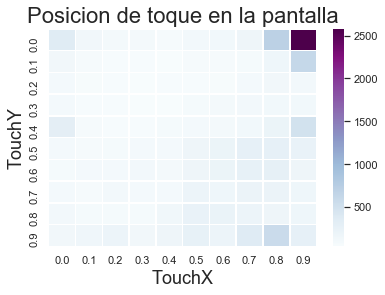

In [32]:
g = sns.heatmap(for_heatmap, linewidths=.5, cmap="BuPu") # annot=True
g.set_title("Posicion de toque en la pantalla", fontsize=22)
g.set_xlabel("TouchX",fontsize=18)
g.set_ylabel("TouchY", fontsize=18);

In [33]:
timeToClick_heatmap = clicks.pivot_table(columns='touchXCategorico', index='touchYCategorico', values='timeToClick')

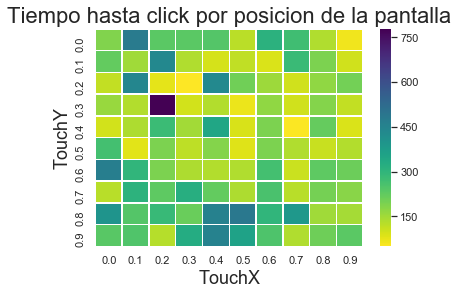

In [34]:
g = sns.heatmap(timeToClick_heatmap, linewidths=.5, cmap="viridis_r") # annot=True
g.set_title("Tiempo hasta click por posicion de la pantalla", fontsize=22)
g.set_xlabel("TouchX",fontsize=18)
g.set_ylabel("TouchY", fontsize=18);

In [35]:
timeToClick_log_heatmap = clicks.pivot_table(columns='touchXCategorico', index='touchYCategorico', values='timeToClick', aggfunc='median')

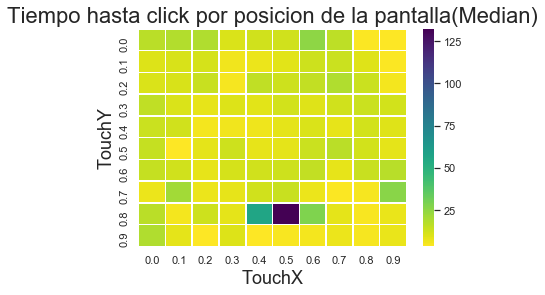

In [36]:
g = sns.heatmap(timeToClick_log_heatmap, linewidths=.5, cmap="viridis_r") # annot=True
g.set_title("Tiempo hasta click por posicion de la pantalla(Median)", fontsize=22)
g.set_xlabel("TouchX",fontsize=18)
g.set_ylabel("TouchY", fontsize=18);

In [37]:
clicks["created"] = clicks["created"].astype("datetime64")


In [38]:
clicks.set_index("created", inplace=True)

In [39]:
clicks.sort_index()

,advertiser_id,source_id,country_code,latitude,longitude,wifi_connection,carrier_id,trans_id,os_minor,agent_device,...,specs_brand,brand,timeToClick,touchX,touchY,ref_type,ref_hash,touchXCategorico,touchYCategorico,actividad
created,,,,,,,,,,,,,,,,,,,,,
2019-03-05 01:17:30.663,0,0,6333597102633388268,1.205689,1.070234,False,4.0,dwOR6mUnkJLVaXbnhDpQGxZLFdANK3o,3.399962e+18,3.516812e+18,...,2733035977666442898,NaN,NaN,0.158,0.097,1494519392962156891,4211224578747712831,0.1,0.0,1
2019-03-05 01:44:16.824,0,1,6333597102633388268,1.205393,1.077238,False,10.0,UrAaN9jolZTycEdgGieNzVVTnHGcBJg,3.399962e+18,3.516812e+18,...,2733035977666442898,NaN,NaN,0.091,0.360,1494519392962156891,6447802891648830796,0.0,0.3,1
2019-03-05 02:07:49.451,0,6,6333597102633388268,1.205689,1.070234,False,13.0,cuSDPTJszQQSMBYLr7-E1-JRxlZOb7c,3.025219e+18,NaN,...,2733035977666442898,NaN,NaN,0.934,0.064,1891515180541284343,3045447270889734275,0.9,0.0,1
2019-03-05 02:15:31.144,0,6,6333597102633388268,1.205689,1.070234,False,13.0,HHkcmHmPHe4yXOCV6O-9vu8lIQZYvJw,3.025219e+18,NaN,...,2733035977666442898,NaN,NaN,0.943,0.085,1891515180541284343,3045447270889734275,0.9,0.0,1
2019-03-05 02:16:08.360,0,1,6333597102633388268,1.205689,1.070234,False,1.0,rV33iQ4D6mExdMexMNq4NfQtUGX2MkY,3.378640e+18,NaN,...,2733035977666442898,0.0,NaN,0.709,0.768,1891515180541284343,2756762601162083130,0.7,0.7,1
2019-03-05 02:16:16.509,0,6,6333597102633388268,1.205689,1.070234,False,13.0,FDuowRJ7ZA4jKddqlw0cgNXHtwjJdwM,3.025219e+18,NaN,...,2733035977666442898,NaN,NaN,0.970,0.073,1891515180541284343,3045447270889734275,0.9,0.0,1
2019-03-05 02:22:03.191,2,3,6333597102633388268,1.235406,1.063737,False,45.0,9AFIc1hsLwyFGInoYold2QAiHW3JB80,6.768137e+18,NaN,...,2733035977666442898,NaN,183.190,0.068,0.432,1891515180541284343,4368617728156436525,0.0,0.4,1
2019-03-05 02:37:29.860,0,1,6333597102633388268,1.205689,1.070234,False,10.0,w6eTnJPPZJjbQqNtxWbfre77ZwFtSkk,3.399962e+18,3.516812e+18,...,2733035977666442898,NaN,NaN,NaN,NaN,1494519392962156891,5957203859194520830,NaN,NaN,1
2019-03-05 05:56:42.811,0,6,6333597102633388268,1.205689,1.070234,False,13.0,Umn83uTnixwl18x_CqipuhYg28meUm8,3.025219e+18,NaN,...,2733035977666442898,NaN,NaN,NaN,NaN,1891515180541284343,6549262258858224332,NaN,NaN,1


In [40]:
clicks_por_dia = clicks.resample('D').size()
print(clicks_por_dia)

created
2019-03-05      30
2019-03-06      13
2019-03-07    2625
2019-03-08    2325
2019-03-09    2565
2019-03-10    3075
2019-03-11    3487
2019-03-12    3853
2019-03-13    3208
Freq: D, dtype: int64


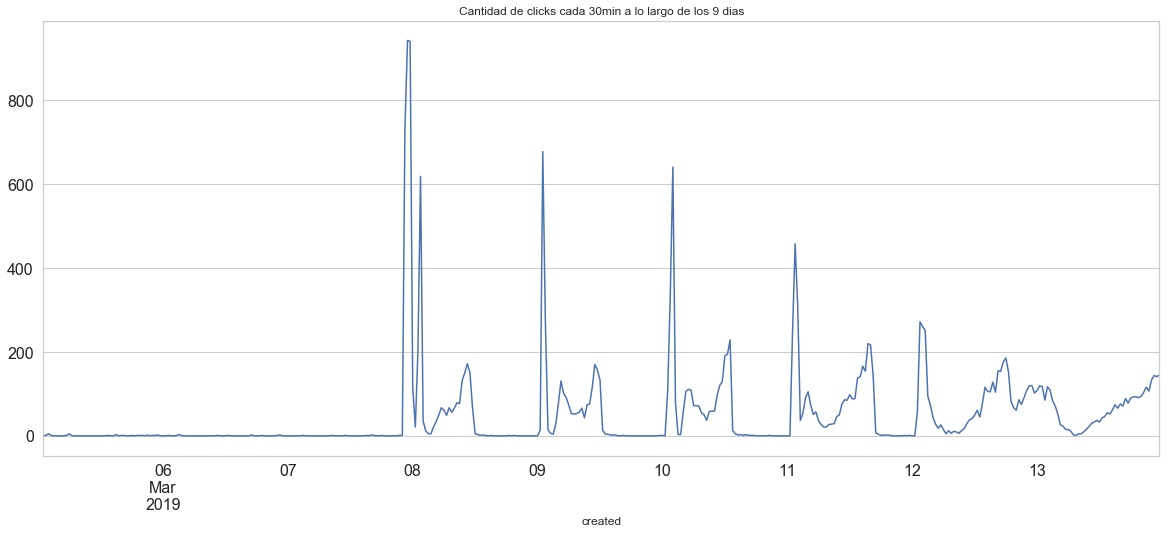

In [41]:
clicks_por_hora = clicks.resample('30T').size()
clicks_por_hora.plot(kind='line', figsize=(20, 8), title='Cantidad de clicks cada 30min a lo largo de los 9 dias', grid=True, fontsize=16);

In [42]:
def hourly_clicks_per_day(date, ax=None):
    clicks[date].resample('30T').size()\
                  .plot(kind='line', figsize=(20, 8), title=date, ax=ax)

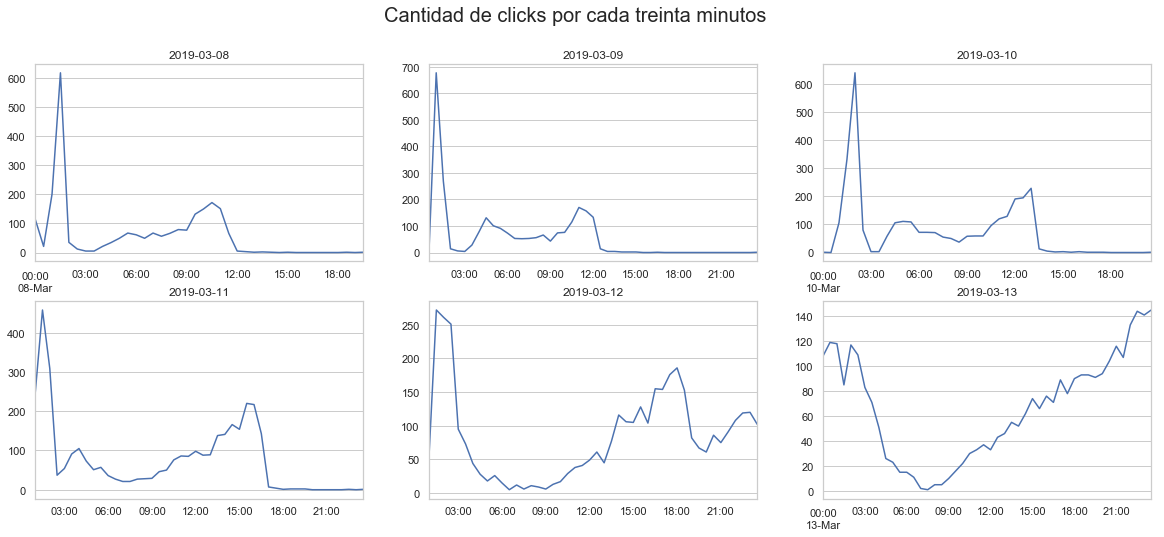

In [43]:
fig, ax_array = plt.subplots(2, 3, figsize=(20,8))
fig.suptitle('Cantidad de clicks por cada treinta minutos', size=20)

dates = ['2019-03-08', '2019-03-09', '2019-03-10', '2019-03-11', '2019-03-12', '2019-03-13']
for day, ax in zip(dates, ax_array.flatten()):
    hourly_clicks_per_day(day, ax)
    ax.set_xlabel('')